# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# Import your libraries:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


In [3]:
font = {
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [4]:
# Your code here:

from sklearn import datasets
diabetes = datasets.load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [5]:
# Your code here:

diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [6]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
diabetes['data'][:,0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626,  0.01728186, -0.03734373],
       [-0.04547248, -0.04464164,  0.03906215,  0.00121513,  0.01631843],
       [-0.04547248, -0.04464164, -0.0730303 , -0.08141377,  0.08374012]])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [9]:
# Your code here:

print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [10]:
# Your code here:

print(diabetes['data'].shape)

print(diabetes.target.shape)

(442, 10)
(442,)


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [11]:
# Your code here:

from sklearn import linear_model

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [12]:
# Your code here:

diabetes_model = linear_model.LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [13]:
# Your code here:

diabetes_data_train = diabetes['data'][:-20]

diabetes_target_train = diabetes['target'][:-20]

diabetes_data_test = diabetes['data'][-20:]

diabetes_target_test = diabetes['target'][-20:]

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [14]:
# Your code here:

diabetes_model.fit(diabetes_data_train, diabetes_target_train)

print(diabetes_model.intercept_)

print(diabetes_model.coef_)

152.76430691633442
[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [15]:
diabetes_data_train

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [-0.02004471, -0.04464164, -0.0547075 , ..., -0.03949338,
        -0.07408887, -0.0052198 ],
       [ 0.02354575, -0.04464164, -0.03638469, ...,  0.03430886,
        -0.03324879,  0.06105391],
       [ 0.03807591,  0.05068012,  0.0164281 , ...,  0.07120998,
         0.04976866,  0.01549073]])

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [16]:
# Your code here:

diabetes_model.predict(diabetes_data_test)

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [17]:
# Your code here:

print(diabetes_target_test)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [18]:
# Your explanation here:


# Bonus Challenge - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://online.stat.psu.edu/stat501/lesson/6) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like [this](https://drive.google.com/file/d/1rm0HdzpTjbX73IjelKJDtu4EcnhPKAsq/view?usp=sharing)

## Function definitions

In [19]:
def show_not_significant_values(pvalues, predictors):
    results_significance = pd.DataFrame()
    results_significance["p_values"] = pvalues[1:]
    results_significance.index =predictors
    return results_significance[results_significance["p_values"]>0.05]

In [20]:
def ols_model_fit(train, target, predictors):
    X2 = sm.add_constant(train)
    ols_model = sm.OLS(target, X2)
    results = ols_model.fit()
    return results, X2,results.pvalues, results.summary(yname='disease progression',xname= ['coef']+predictors)

In [21]:
def plotting(x,y,x_label,y_label,font):
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(x,y,'o',color='red')
    ax.set_xlabel(x_label,fontsize=font)
    ax.set_ylabel(y_label,fontsize=font)
    fig.tight_layout()
    return 

In [22]:
def feature_selector(predictors, data_df):
    index_pred=[]
    for predictor in predictors:
        index_predictor=diabetes['feature_names'].index(predictor)
        index_pred.append(index_predictor)
    return data_df[:,index_pred]

## Linear model with all features

In [26]:
features=diabetes['feature_names']
_,_,p_values, summary= ols_model_fit(diabetes_data_train, diabetes_target_train, features)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     disease progression   R-squared:                       0.512
Model:                             OLS   Adj. R-squared:                  0.500
Method:                  Least Squares   F-statistic:                     43.16
Date:                 Sat, 06 Jun 2020   Prob (F-statistic):           4.64e-58
Time:                         13:35:46   Log-Likelihood:                -2281.1
No. Observations:                  422   AIC:                             4584.
Df Residuals:                      411   BIC:                             4629.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
coef         152.7643      2.658     57.469      0.000     147.539     157.990
age            0.3035     61.286      0.005      0.996    -120.169     120.776
sex         -237.6393     62.837     -3.782      0.000    -361.162    -114.117
bmi          510.5306     68.156      7.491      0.000     376.553     644.508
bp           327.7370     66.876      4.901      0.000     196.275     459.199
s1          -814.1317    424.044     -1.920      0.056   -1647.697      19.434
s2           492.8146    344.227      1.432      0.153    -183.850    1169.480
s3           102.8485    219.463      0.469      0.640    -328.561     534.258
s4           184.6065    167.336      1.103      0.271    -144.334     513.547
s5           743.5196    175.359      4.240      0.000     398.807    1088.232
s6            76.0952     68.293      1.114      0.266     -58.152     210.343
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.421
Skew:                           0.004   Prob(JB):                        0.491
Kurtosis:                       2.716   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Goal of the model: explain or predict

The goal of a model can be to explain, predict or both. 
- Explaining means that by changing one of the variables in the model, while the others are kept constant, I can estimate the effect of the change of the predictor on the response variable.<br>
  For example my model for 'house_price' $h_{p}$ is

$$ h_{p}=\beta_{1} N_{r}+\beta_{2}S_{h}+\beta_{3}Y_{b}$$ 

- Explain: If I increase predictor $N_{r}$ by 1 unit the target $h_{p}$ increases by $\beta_{1}$.<br> This is signaled by significant p-values for the coefficients $\beta_{1}, \beta_{2}, \beta_{3}$
- Predicting means your model can predict the target Y. This is signaled by a high
  $R^{2}$ score 
  
**It is possible to have highly predictive models that are poor explainers**

Example: when you have multicollinearity among the predictor variables. For example $N_{r}$ and $S_{h}$ are strongly correlated, my model loses explanatory power because I cannot untangle the effect of the variables on the predictor. But the model overall, could still be able to predict the target variable $h_{p}$ well and achieving a high $R^2$

## Strategy to improve model explainability


In this case many parameters are non significant-we could improve model explanatory power by removing them. We could remove them directly but better by studying the correlations. If non significance is driven by collinearity we should see a correspondence. Good strategy could be to prefer features highly correlated with target bu weakly correlated with each other


### Pair correlations
Here we transform the dataset from dictionary to dataframe and analyze pair correlations

In [27]:
# transform train data set into a dataframe
df_features = pd.DataFrame(diabetes_data_train, columns=diabetes['feature_names'])
df_target=pd.DataFrame(diabetes_target_train, columns=['target'])
df_tot=pd.concat([df_features,df_target], axis=1)

In [28]:
#correlation matrix
df_tot.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.160903,0.184410,0.325651,0.274218,0.225132,-0.055302,0.196630,0.272408,0.294157,0.190093
sex,0.160903,1.000000,0.076407,0.224245,0.038637,0.142662,-0.372199,0.327998,0.143950,0.199691,0.036863
bmi,0.184410,0.076407,1.000000,0.382890,0.257508,0.268416,-0.361736,0.418926,0.437261,0.383820,0.578905
bp,0.325651,0.224245,0.382890,1.000000,0.248217,0.185123,-0.162232,0.250832,0.387551,0.389333,0.437659
s1,0.274218,0.038637,0.257508,0.248217,1.000000,0.896138,0.040240,0.547041,0.520250,0.325745,0.217091
s2,0.225132,0.142662,0.268416,0.185123,0.896138,1.000000,-0.200766,0.658374,0.315807,0.289304,0.177490
s3,-0.055302,-0.372199,-0.361736,-0.162232,0.040240,-0.200766,1.000000,-0.742383,-0.399537,-0.279590,-0.393215
s4,0.196630,0.327998,0.418926,0.250832,0.547041,0.658374,-0.742383,1.000000,0.617881,0.422934,0.433315
s5,0.272408,0.143950,0.437261,0.387551,0.520250,0.315807,-0.399537,0.617881,1.000000,0.465066,0.559669
s6,0.294157,0.199691,0.383820,0.389333,0.325745,0.289304,-0.279590,0.422934,0.465066,1.000000,0.387471


In [29]:
show_not_significant_values(p_values, features)

,p_values
age,0.996051
s1,0.055559
s2,0.153002
s3,0.639578
s4,0.270581
s6,0.265827


We see that some of the non-significant coefficients have high correlations, so we could 
remove the highest correlated features. 

One issue with this method is that it only looks at pair correlations among variables. In reality more than 2 variables could be correlated, the correlation coefficient does not pick up on that. A step further is to use a tool that quantifies multiple correlations, like the **variance inflation factor**

### Remove features

In [30]:
# drop feature weakly correlated with target
df_tot.drop(columns='sex',inplace=True)

In [31]:
#drop highly correlated features
df_tot.drop(columns=['s2','s3'],inplace=True)

In [32]:
df_tot.corr()

,age,bmi,bp,s1,s4,s5,s6,target
age,1.000000,0.184410,0.325651,0.274218,0.196630,0.272408,0.294157,0.190093
bmi,0.184410,1.000000,0.382890,0.257508,0.418926,0.437261,0.383820,0.578905
bp,0.325651,0.382890,1.000000,0.248217,0.250832,0.387551,0.389333,0.437659
s1,0.274218,0.257508,0.248217,1.000000,0.547041,0.520250,0.325745,0.217091
s4,0.196630,0.418926,0.250832,0.547041,1.000000,0.617881,0.422934,0.433315
s5,0.272408,0.437261,0.387551,0.520250,0.617881,1.000000,0.465066,0.559669
s6,0.294157,0.383820,0.389333,0.325745,0.422934,0.465066,1.000000,0.387471
target,0.190093,0.578905,0.437659,0.217091,0.433315,0.559669,0.387471,1.000000


In [33]:
feature_list=['age', 'bmi', 'bp', 's1', 's4','s5','s6' ]

In [34]:
selected_features=feature_selector(feature_list,diabetes_data_train)

In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(selected_features, i) for i in range(selected_features.shape[1])]
vif.index = feature_list
vif

,VIF Factor
age,1.200059
bmi,1.417991
bp,1.386355
s1,1.590592
s4,1.957418
s5,2.026534
s6,1.476458


In [36]:
_,_,p_values, summary= ols_model_fit(selected_features, diabetes_target_train, feature_list)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     disease progression   R-squared:                       0.493
Model:                             OLS   Adj. R-squared:                  0.484
Method:                  Least Squares   F-statistic:                     57.52
Date:                 Sat, 06 Jun 2020   Prob (F-statistic):           2.80e-57
Time:                         13:36:11   Log-Likelihood:                -2289.2
No. Observations:                  422   AIC:                             4594.
Df Residuals:                      414   BIC:                             4627.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
coef         152.7961      2.700     56.592      0.000     147.489     158.103
age          -19.4176     61.857     -0.314      0.754    -141.011     102.176
bmi          561.1763     67.536      8.309      0.000     428.421     693.932
bp           282.1877     66.766      4.227      0.000     150.945     413.430
s1          -263.2941     71.734     -3.670      0.000    -404.303    -122.286
s4           172.2499     79.220      2.174      0.030      16.526     327.974
s5           555.1739     80.144      6.927      0.000     397.633     712.715
s6            61.1399     69.202      0.884      0.377     -74.891     197.170
==============================================================================
Omnibus:                        6.248   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.445
Skew:                           0.112   Prob(JB):                        0.108
Kurtosis:                       2.550   Cond. No.                         35.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
df_tot.drop(columns=['age','s6'],inplace=True)

In [38]:
feature_list=['sex', 'bmi', 'bp', 's1', 's3','s5' ]

In [39]:
selected_features=feature_selector(feature_list,diabetes_data_train)

In [40]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(selected_features, i) for i in range(selected_features.shape[1])]
vif.index = feature_list
vif

,VIF Factor
sex,1.233499
bmi,1.442393
bp,1.328550
s1,1.558013
s3,1.644263
s5,2.004329


In [41]:
result, fin_features,p_values, summary= ols_model_fit(selected_features, diabetes_target_train, feature_list)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     disease progression   R-squared:                       0.507
Model:                             OLS   Adj. R-squared:                  0.500
Method:                  Least Squares   F-statistic:                     71.13
Date:                 Sat, 06 Jun 2020   Prob (F-statistic):           1.04e-60
Time:                         13:36:17   Log-Likelihood:                -2283.3
No. Observations:                  422   AIC:                             4581.
Df Residuals:                      415   BIC:                             4609.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
coef         152.6832      2.659     57.424      0.000     147.457     157.910
sex         -222.8977     62.084     -3.590      0.000    -344.935    -100.860
bmi          531.7444     67.086      7.926      0.000     399.874     663.615
bp           336.7561     64.374      5.231      0.000     210.216     463.296
s1          -134.5639     69.922     -1.925      0.055    -272.008       2.881
s3          -253.5216     72.756     -3.485      0.001    -396.538    -110.505
s5           542.1600     78.502      6.906      0.000     387.849     696.471
==============================================================================
Omnibus:                        1.254   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.228
Skew:                           0.029   Prob(JB):                        0.541
Kurtosis:                       2.742   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualize prediction - target
Here we visualize some of the results

In [42]:
y_predicted = result.predict(fin_features)

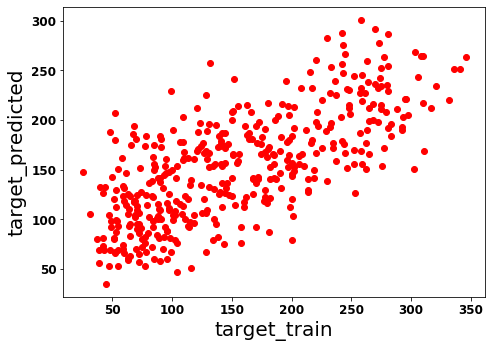

In [43]:
plotting(diabetes_target_train,y_predicted,'target_train','target_predicted',20)

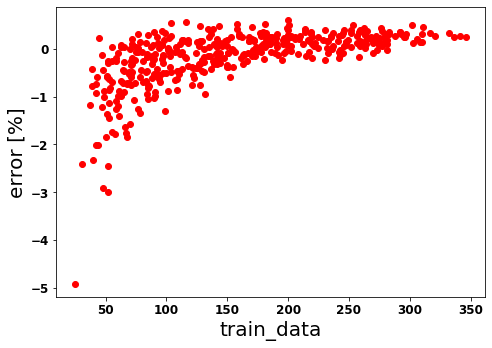

In [44]:
plotting(diabetes_target_train,(diabetes_target_train-y_predicted)/(diabetes_target_train),'train_data','error [%]',20)

#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interview containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

# Challenge 3 - Perform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [51]:
# Your code here:

auto = pd.read_csv('../data/auto-mpg.csv')


Look at the first 5 rows using the `head()` function:

In [52]:
# Your code here:

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [53]:
# Your code here:

auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

In [54]:
auto.corr()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horse_power,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [55]:
auto.shape

(398, 8)

In [56]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(auto, i) for i in range(auto.shape[1])]
vif.index = feature_list
vif

TypeError: '(slice(None, None, None), 0)' is an invalid key

What is the newest model year and the oldest model year?

In [57]:
# Your code here:

auto.model_year.min(), auto.model_year.max()

(70, 82)

Check the dataset for missing values and remove all rows containing at least one missing value.

In [58]:
# Your code here:

auto.isna().sum()
auto.dropna(inplace=True)

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [59]:
# Your code here:

auto.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [60]:
# Your code here:

from sklearn.model_selection import train_test_split

auto.drop(columns=['car_name'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(auto[[x for x in auto.columns.values if x != "mpg"]], auto["mpg"], train_size = 0.8)

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [61]:
# Your code here:

auto_model = linear_model.LinearRegression()

auto_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Bonus Challenge - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](https://online.stat.psu.edu/stat501/lesson/1/1.5/1.5.2) 


#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [62]:
# Your code here:

from sklearn.metrics import r2_score

y_pred = auto_model.predict(X_train)
r2_score(y_train, y_pred) 

0.8123314748365033

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [63]:
# Your code here:

y_test_pred = auto_model.predict(X_test)
r2_score(y_test, y_test_pred)

0.7970584550272739

#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [64]:
# Your code here:

X_train09, X_test09, y_train09, y_test09 = train_test_split(auto[[x for x in auto.columns.values if x != "mpg"]], auto["mpg"], train_size = 0.9)

Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [65]:
# Your code here:

auto_model09 = linear_model.LinearRegression()
auto_model09.fit(X_train09, y_train09)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Compute the predicted values and r squared score for our new model and new sample data.

In [66]:
# Your code here:

y_pred09 = auto_model09.predict(X_train09)
r2_score(y_train09, y_pred09) 

0.8032641355113883

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [67]:
# Your code here:

y_test_pred09 = auto_model09.predict(X_test09)
r2_score(y_test09, y_test_pred09)

0.8548075701857877

# Bonus Challenge - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [68]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [69]:
# Your code here:

rfe = RFE(auto_model, n_features_to_select=3, verbose =3 )

Fit the model and print the ranking

In [70]:
# Your code here:

rfe.fit(X_train,y_train)
rfe.ranking_


Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


array([1, 2, 4, 3, 1, 1])

In [71]:
X_train.columns

Index(['cylinders', 'displacement', 'horse_power', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [72]:
# Your code here:

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    auto[["cylinders", "acceleration", "model_year"]], auto["mpg"], train_size = 0.8)

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [73]:
# Your code here: 

auto_model_reduced = linear_model.LinearRegression()
auto_model_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = auto_model_reduced.predict(X_train_reduced)
r2_score(y_train_reduced, y_pred_reduced) 

0.714560982170316

#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.